# TASK 1: Mounting Drive 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# TASK 2: IMPORT LIBRARIES/DATASETS

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout,Conv2D,BatchNormalization,MaxPooling2D,Flatten,Input,AveragePooling2D
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
with open("/content/drive/My Drive/WorkSpace/Projects/TrafficSigns/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/WorkSpace/Projects/TrafficSigns/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/WorkSpace/Projects/TrafficSigns/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [41]:
X_train, y_train=train['features'],train['labels']
X_train.shape,y_train.shape

((34799, 32, 32, 3), (34799,))

In [42]:
X_val,y_val=valid['features'],valid['labels']
X_val.shape,y_val.shape

((4410, 32, 32, 3), (4410,))

In [43]:
X_test,y_test=test['features'],test['labels']
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

# TASK 3: PERFORM IMAGES VISUALIZATION

5

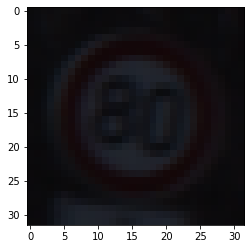

In [44]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

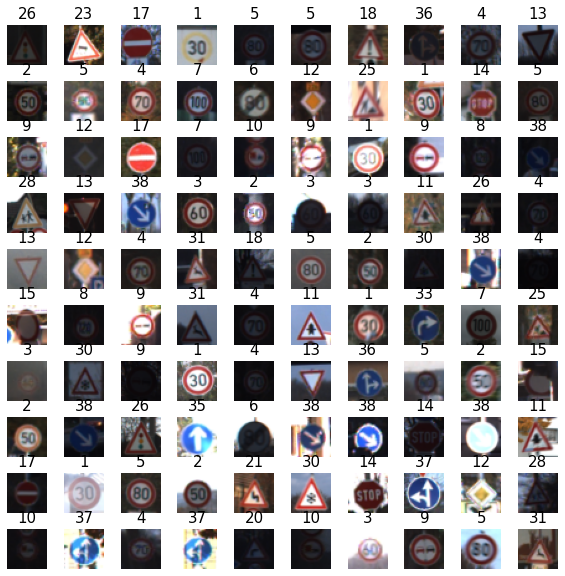

In [45]:
W_grid = 10
L_grid = 10
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel()
n_train = len(X_train) 
for i in np.arange(0,W_grid*L_grid):
  j=np.random.randint(0,n_train)
  axes[i].imshow(X_train[j])   
  axes[i].set_title(y_train[j],fontsize=15)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# TASK 4: Image Augmentation and Data Generator

In [46]:
train_gen=ImageDataGenerator(
    rescale=1./255.,rotation_range=20
)
val_gen=ImageDataGenerator(
    rescale=1./255.
)
test_gen=ImageDataGenerator(
    rescale=1./255.
)

In [47]:
train=NumpyArrayIterator(X_train,y_train,train_gen,batch_size=128,shuffle=True, )
val=NumpyArrayIterator(X_val,y_val,val_gen,batch_size=32)
test=NumpyArrayIterator(X_test,y_test,test_gen,batch_size=64)

# TASK 5: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [76]:
model=tf.keras.models.Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
#model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
#model.add(Dense(128,activation='relu'))
model.add(Dense(43,activation='softmax'))
#model.add(Dense(43,activation='relu'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 15, 15, 64)       

# TASK 6: COMPILE AND TRAIN DEEP CNN MODEL

In [77]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [78]:
history=model.fit(train,validation_data=val,epochs=5,verbose=1)

Epoch 1/5
272/272 [==============================] - 22s 82ms/step - loss: 0.9696 - accuracy: 0.7250 - val_loss: 4.5138 - val_accuracy: 0.1227
Epoch 2/5
272/272 [==============================] - 22s 82ms/step - loss: 0.1179 - accuracy: 0.9646 - val_loss: 0.3243 - val_accuracy: 0.9095
Epoch 3/5
272/272 [==============================] - 22s 81ms/step - loss: 0.0623 - accuracy: 0.9808 - val_loss: 0.1748 - val_accuracy: 0.9594
Epoch 4/5
272/272 [==============================] - 22s 81ms/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.1223 - val_accuracy: 0.9694
Epoch 5/5
272/272 [==============================] - 22s 82ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.1769 - val_accuracy: 0.9619


# TASK 7: ASSESS TRAINED CNN MODEL PERFORMANCE 

In [56]:
score = model.evaluate(X_test/255., y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 5ms/step - loss: 0.2370 - accuracy: 0.9521
Test Accuracy: 0.9520981907844543


In [57]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [58]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

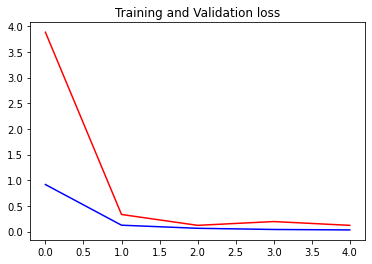

In [59]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'b',label='Traninig loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

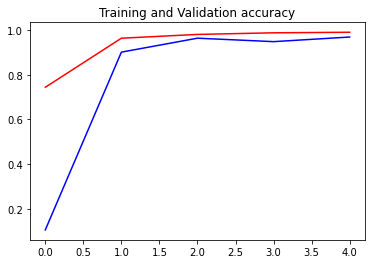

In [60]:
epochs=range(len(accuracy))
plt.plot(epochs,val_accuracy,'b',label='Traninig accuracy')
plt.plot(epochs,accuracy,'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')

In [70]:
predicted_classes = np.argmax(model.predict(X_test/255.), axis=-1)
y_true = y_test

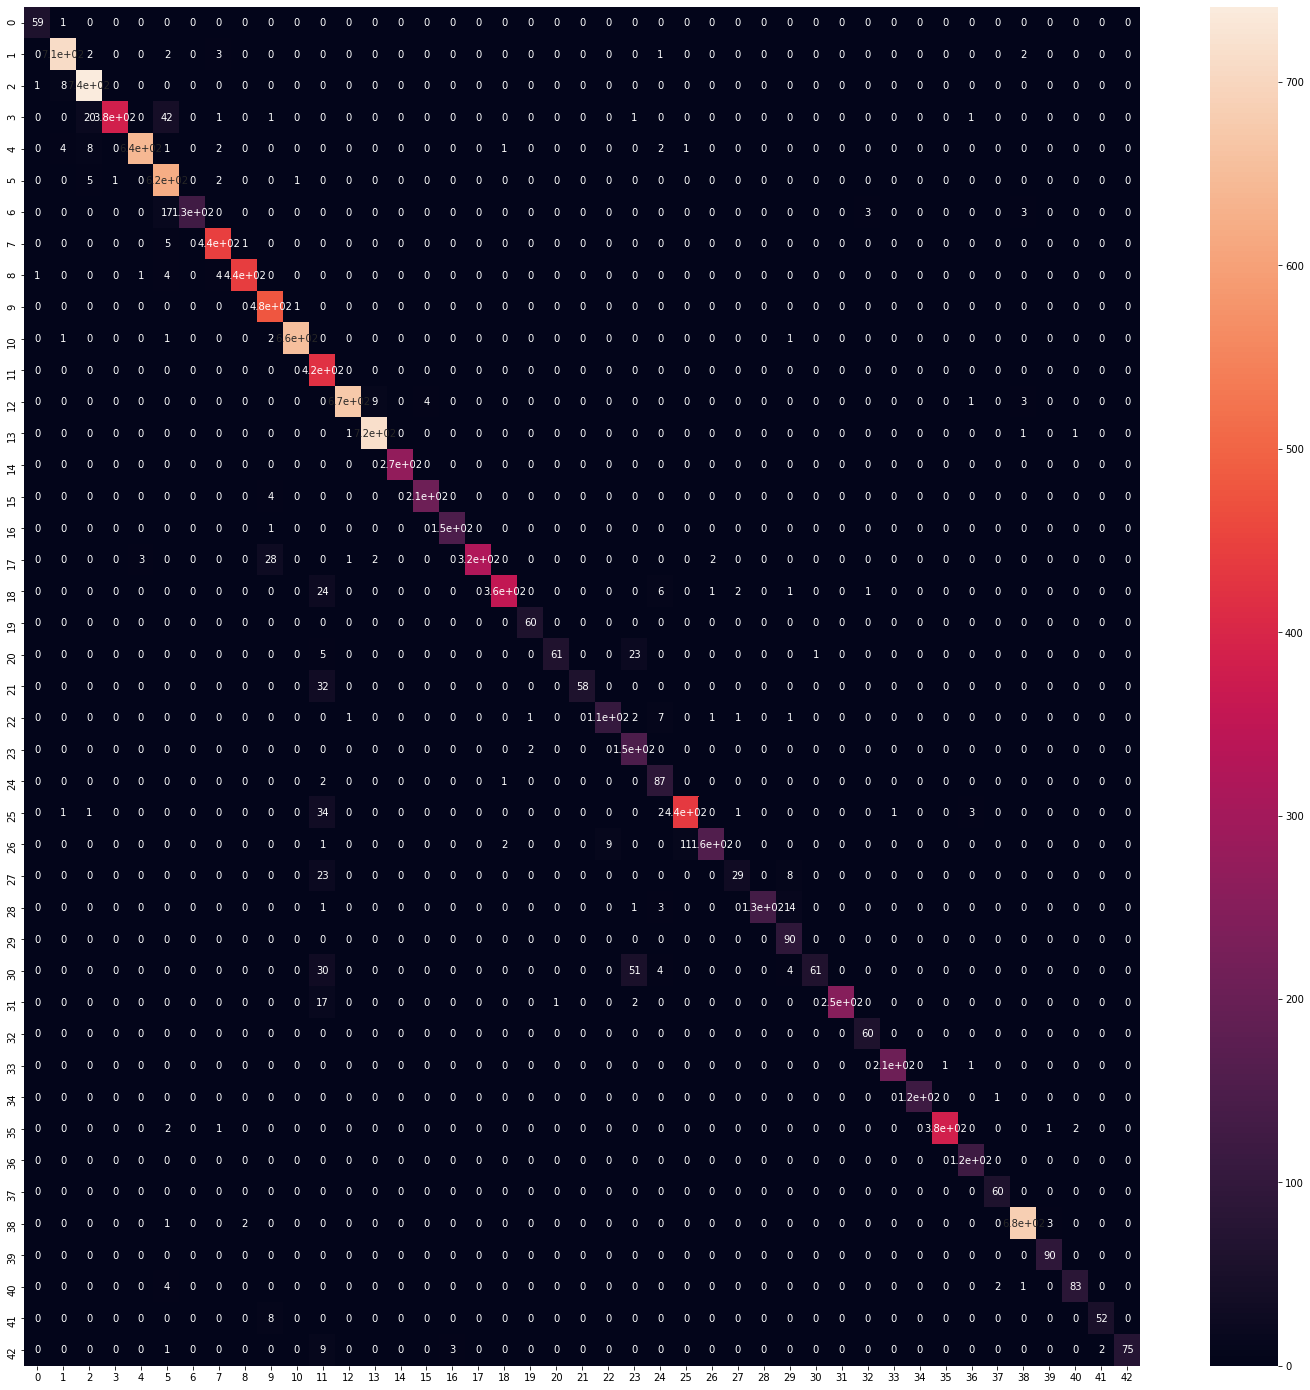

In [71]:
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

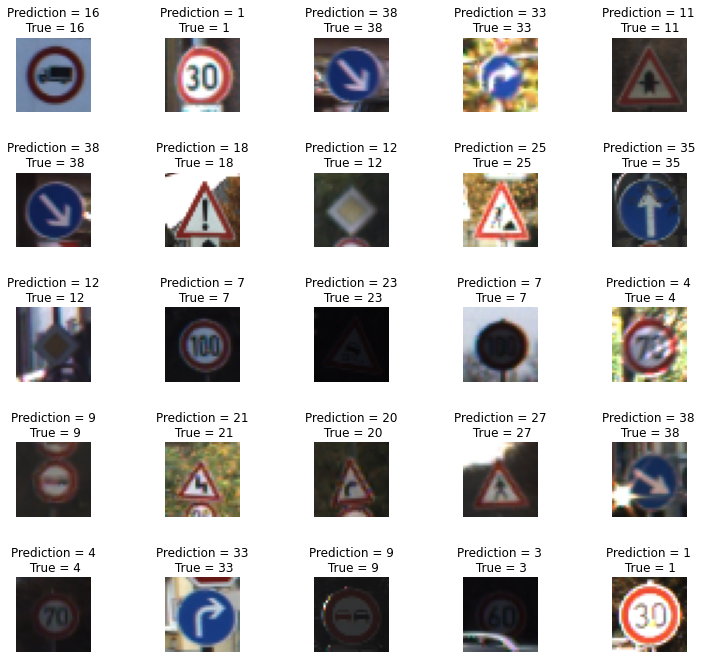

In [72]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons